# Loan Approval Prediction

This generic problem was discovered on the Internet. I cannot remember the source, but it was at a point where I would search for any Machine Learning problems and attempt to solve. In this example, the objective was to predict whether individuals would be approved for a financial loan. The final output will have the actual value and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [2]:
dataset=r'C:\Users\claudius.ibine\Desktop\loan-dataset.csv'
dataset=pd.read_csv(dataset,index_col=None)
del dataset['Loan_ID']
dataset['Income']=dataset['ApplicantIncome']+dataset['CoapplicantIncome']
del dataset['ApplicantIncome']
del dataset['CoapplicantIncome']

Here is where I summarize the dataset.

In [5]:
def aggregate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(5))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [6]:
aggregate()

The number of rows by columns:  (614, 11)

The first 10 records are:
  Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No         NaN   
1   Male     Yes          1      Graduate            No       128.0   
2   Male     Yes          0      Graduate           Yes        66.0   
3   Male     Yes          0  Not Graduate            No       120.0   
4   Male      No          0      Graduate            No       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Income  
0             360.0             1.0         Urban           Y  5849.0  
1             360.0             1.0         Rural           N  6091.0  
2             360.0             1.0         Urban           Y  3000.0  
3             360.0             1.0         Urban           Y  4941.0  
4             360.0             1.0         Urban           Y  6000.0  

The dataset datatypes are:
Gender               object
Married         

Here is where I clean the dataset.

In [7]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min
    print(dataset.head(10))

In [8]:
clean()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64
       LoanAmount  Loan_Amount_Term  Credit_History        Income
count  592.000000         600.00000      564.000000    614.000000
mean   146.412162         342.00000        0.842199   7024.705081
std     85.587325          65.12041        0.364878   6458.663872
min      9.000000          12.00000        0.000000   1442.000000
25%    100.000000         360.00000        1.000000   4166.000000
50%    128.000000         360.00000        1.000000   5416.500000
75%    168.000000         360.00000        1.000000   7521.750000
max    700.000000         480.00000        1.000000  81000.000000
  Gender Married Dependents     Education Self_Employed  LoanAmount  \
0   Male      No          0      Graduate            No         NaN  

In [9]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['LoanAmount'].fillna((dataset['LoanAmount'].mean()), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

dataset['Income']=pd.cut(dataset['Income'],[0, 40000, 60000, 80000, 100000, 200000,500000,1000000000,1000000000000000000], labels=['0-40000', '40000-60000', '60000-80000','80000-100000','100000-200000','200000-500000','500000-1000000000','1000000000+'])
dataset['LoanAmount']=pd.cut(dataset['LoanAmount'],[0,200,400,600,800,1000,10000,100000,1000000000],labels=['0-200','200-400','400-600','600-800','800-1000','1000-10000','10000-100000','100000-1000000000'])

In [10]:
print(dataset)

     Gender Married Dependents     Education Self_Employed LoanAmount  \
0      Male      No          0      Graduate            No      0-200   
1      Male     Yes          1      Graduate            No      0-200   
2      Male     Yes          0      Graduate           Yes      0-200   
3      Male     Yes          0  Not Graduate            No      0-200   
4      Male      No          0      Graduate            No      0-200   
5      Male     Yes          2      Graduate           Yes    200-400   
6      Male     Yes          0  Not Graduate            No      0-200   
7      Male     Yes         3+      Graduate            No      0-200   
8      Male     Yes          2      Graduate            No      0-200   
9      Male     Yes          1      Graduate            No    200-400   
10     Male     Yes          2      Graduate            No      0-200   
11     Male     Yes          2      Graduate            No      0-200   
12     Male     Yes          2      Graduate       

Here I will convert the string values to numericals for the machine learning model.

In [11]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.Gender = le.fit_transform(processed_df.Gender)
    processed_df.Married = le.fit_transform(processed_df.Married)
    processed_df.Dependents = le.fit_transform(processed_df.Dependents)
    processed_df.Education = le.fit_transform(processed_df.Education)
    processed_df.Self_Employed = le.fit_transform(processed_df.Self_Employed)
    processed_df.Loan_Amount_Term = le.fit_transform(processed_df.Loan_Amount_Term)
    processed_df.Credit_History = le.fit_transform(processed_df.Credit_History)
    processed_df.Loan_Status = le.fit_transform(processed_df.Loan_Status)
    processed_df.Property_Area = le.fit_transform(processed_df.Property_Area)
    processed_df.Income = le.fit_transform(processed_df.Income)
    processed_df.LoanAmount = le.fit_transform(processed_df.LoanAmount)
    return processed_df
dataset=preprocess_dataset(dataset)

In [12]:
print(dataset)

     Gender  Married  Dependents  Education  Self_Employed  LoanAmount  \
0         1        0           0          0              0           0   
1         1        1           1          0              0           0   
2         1        1           0          0              1           0   
3         1        1           0          1              0           0   
4         1        0           0          0              0           0   
5         1        1           2          0              1           1   
6         1        1           0          1              0           0   
7         1        1           3          0              0           0   
8         1        1           2          0              0           0   
9         1        1           1          0              0           1   
10        1        1           2          0              0           0   
11        1        1           2          0              0           0   
12        1        1           2      

Here I will identify the feature and target column and split the dataset into training and testing

In [13]:
feature=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Income']
target='Loan_Status'

x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best machine learning model for this problem.

In [14]:
def algorithms():
    print('The predicted accuracy scores for the models are as follows:')
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_prediction=lr.predict(x_test)
    print('LR: {0:4f}'.format(metrics.accuracy_score(y_test,lr_prediction)))

    lda=LinearDiscriminantAnalysis()
    lda.fit(x_train,y_train)
    lda_prediction=lda.predict(x_test)
    print('LDA: {0:4f}'.format(metrics.accuracy_score(y_test,lda_prediction)))

    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_prediction=knn.predict(x_test)
    print('KNN: {0:4f}'.format(metrics.accuracy_score(y_test,knn_prediction)))

    cart=DecisionTreeClassifier()
    cart.fit(x_train,y_train)
    cart_prediction=cart.predict(x_test)
    print('CART: {0:4f}'.format(metrics.accuracy_score(y_test,cart_prediction)))

    nb=GaussianNB()
    nb.fit(x_train,y_train)
    nb_prediction=nb.predict(x_test)
    print('NB: {0:4f}'.format(metrics.accuracy_score(y_test,nb_prediction)))

    svm=SVC()
    svm.fit(x_train,y_train)
    svm_prediction=svm.predict(x_test)
    print('SVM: {0:4f}'.format(metrics.accuracy_score(y_test,svm_prediction)))

In [15]:
algorithms()

The predicted accuracy scores for the models are as follows:
LR: 0.780488
LDA: 0.780488
KNN: 0.723577
CART: 0.678862
NB: 0.788618
SVM: 0.780488


Here I will fit the machine learning model.

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_prediction=lr.predict(x_test)

In [17]:
features=x_test.reset_index()
features=features[['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Income']]
actual=(list(y_test))
prediction=(list(lr_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)

In [18]:
print(actual)

[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]


In [19]:
print(prediction)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
final=features[['actual','prediction']]

In [21]:
print(final)

     actual  prediction
0         1           1
1         1           1
2         0           1
3         0           1
4         1           1
5         1           1
6         0           1
7         0           0
8         0           1
9         1           1
10        1           1
11        1           1
12        1           1
13        0           1
14        0           0
15        1           1
16        0           1
17        1           1
18        1           1
19        1           1
20        1           0
21        1           1
22        1           1
23        1           1
24        0           0
25        1           1
26        0           1
27        1           1
28        1           1
29        1           1
..      ...         ...
216       1           1
217       1           1
218       1           1
219       1           1
220       0           1
221       0           1
222       1           1
223       1           1
224       1           1
225       1     

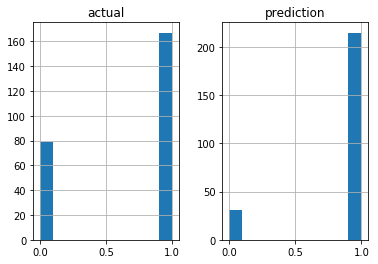

In [23]:
final.hist()
plt.show()